# Homework 3: Visualizing Data with Movies

Name: Manh Tuong Nguyen

Date: 09/12/2024

#### Overview
In this homework, you'll create a movie visualization of a model parameter such as temperature, salinity, velocity, or any other field which may be of interest to you. 

As an example, I've provided a movie of circulation in the Equatorial Pacific from the NASA ECCO Version 5 State Estimate. For the purposes of this visualization, I subsetted the Equatorial Pacific is the region between 155-75$^{\circ}$W and $\pm$20$^{\circ}$N.

#### Import Modules
Import the modules required to access data from netCDF files, plot it, and stitch panels together into a movie:

In [34]:
# import modules here
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import moviepy.video.io.ImageSequenceClip
import xarray as xr

## Part 1: Download Data
To begin this exercise, download all of the available data for your variable of interest over the timespan of interest.

For the example provided, I've used daily sea surface temperature data for a given year (2015) from the ECCO Version 5 Alpha output [HERE](https://ecco.jpl.nasa.gov/drive/files/Version5/Alpha/latlon_daily/SST.nc).

To obtain your data, use the [Downloading ECCO Data](https://github.com/ProfMikeWood/ocean_modeling_book/blob/main/tools/Downloading%20ECCO%20Data.ipynb) notebook provided with the course notes. Be sure to edit the fields to obtain the correct data.

In [35]:
# define the path to the data folder
data_folder = '/Volumes/T7/Data'

## Part 2: Create a Single Plot of Sea Surface Temperature
Before making a movie, its useful to fine tune a single plot to get the details right. Once you've got your plot lookin' good, you can loop through all of the data to generate the panels of your movie.

Here, make a plot of one variable field. 

Begin by reading in the longitude, latitude, and SST fields from the netCDF file:

In [36]:
# read in the data
data_file = os.path.join(data_folder,'ECCO','Version5','Alpha',
                              'latlon_daily','SST.nc','SST_20150101.nc')
ds_data = xr.open_dataset(data_file, decode_times=False)
data = np.array(ds_data['SST'][:])
lon = np.array(ds_data['LONGITUDE_T'][:])
lat = np.array(ds_data['LATITUDE_T'][:])
# ds_data 

Next, find the locations of the longitude and latitude bounds within the global grid for your region of interest:

In [37]:
# define the longitude/latitude bounds
min_lon = 100
max_lon = 126
min_lat = -6
max_lat = 26

# compute the min/max row/col in the data grid
min_row = ds_data['LATITUDE_T'].sel(LATITUDE_T=min_lat, method="nearest").values.item()  # closest latitude to min_lat
max_row = ds_data['LATITUDE_T'].sel(LATITUDE_T=max_lat, method="nearest").values.item()  # closest latitude to max_lat
min_col = ds_data['LONGITUDE_T'].sel(LONGITUDE_T=min_lon, method="nearest").values.item()  # closest longitude to 
max_col = ds_data['LONGITUDE_T'].sel(LONGITUDE_T=max_lon, method="nearest").values.item()

min_lat_grid_idx = int(ds_data['LATITUDE_T'].to_index().get_loc(min_row))
max_lat_grid_idx = int(ds_data['LATITUDE_T'].to_index().get_loc(max_row))
min_lon_grid_idx = int(ds_data['LONGITUDE_T'].to_index().get_loc(min_col))
max_lon_grid_idx = int(ds_data['LONGITUDE_T'].to_index().get_loc(max_col))


Use the row and column bounds to subset the longitude, latitude, and your variable:

In [38]:
# subset the data
subset = data[0,min_lat_grid_idx : max_lat_grid_idx, min_lon_grid_idx : max_lon_grid_idx]

Finally, make a plot with your subsetted data. For the plot specification, you can use any colormap, data range, and format as you like.

For my example, I find that the temperature plot looks nice with a figure size of (8,4), a turbo colormap, and a data range of 20-31. However, you are encouraged to format your plot to your tastes.

Text(0.5, 1.0, 'Surface Temperature in South China Sea in January')

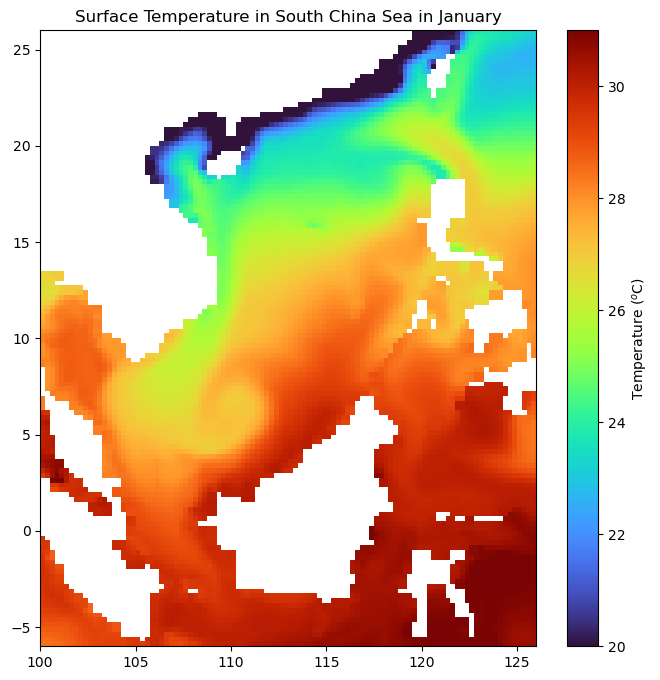

In [39]:
# make your figure here

fig = plt.figure(figsize=(8,8))
ax = plt.pcolormesh(lon[min_lon_grid_idx:max_lon_grid_idx], lat[min_lat_grid_idx:max_lat_grid_idx], subset[:,:], cmap='turbo', vmin=20, vmax=31)
plt.colorbar(ax, label='Temperature (${^o}$C)')
plt.title('Surface Temperature in South China Sea in ' + "January")



## Part 3: Formulate a Plotting Function
When you are happy with your plot, make your code into a function that will take the year, month, and day as inputs, and output the figure into a given directory. 

In [40]:
def plot_panel(year,month,day):
    # fill in your function here
    month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

    data_file = os.path.join(data_folder,'ECCO','Version5','Alpha',
                              'latlon_daily','SST.nc','SST_'+str(year)+'{:02}'.format(month)+'{:02}'.format(day)+'.nc')
    frames_folder = '/Users/eddie/cs185c_fall2024/homework/homework_3/Frames'
    ds_data = xr.open_dataset(data_file, decode_times=False)
    data = np.array(ds_data['SST'][:])
    lon = np.array(ds_data['LONGITUDE_T'][:])
    lat = np.array(ds_data['LATITUDE_T'][:])   

    min_lon = 100
    max_lon = 126
    min_lat = -6
    max_lat = 26

    # compute the min/max row/col in the data grid
    min_row = ds_data['LATITUDE_T'].sel(LATITUDE_T=min_lat, method="nearest").values.item()  # closest latitude to min_lat
    max_row = ds_data['LATITUDE_T'].sel(LATITUDE_T=max_lat, method="nearest").values.item()  # closest latitude to max_lat
    min_col = ds_data['LONGITUDE_T'].sel(LONGITUDE_T=min_lon, method="nearest").values.item()  # closest longitude to 
    max_col = ds_data['LONGITUDE_T'].sel(LONGITUDE_T=max_lon, method="nearest").values.item()

    min_lat_grid_idx = int(ds_data['LATITUDE_T'].to_index().get_loc(min_row))
    max_lat_grid_idx = int(ds_data['LATITUDE_T'].to_index().get_loc(max_row))
    min_lon_grid_idx = int(ds_data['LONGITUDE_T'].to_index().get_loc(min_col))
    max_lon_grid_idx = int(ds_data['LONGITUDE_T'].to_index().get_loc(max_col))

    subset = data[0,min_lat_grid_idx : max_lat_grid_idx, min_lon_grid_idx : max_lon_grid_idx]
    file_name = os.path.join(frames_folder, 'SST_'+str(year)+'{:02}'.format(month)+'{:02}'.format(day))
    
    fig = plt.figure(figsize=(8,8))
    ax = plt.pcolormesh(lon[min_lon_grid_idx:max_lon_grid_idx], lat[min_lat_grid_idx:max_lat_grid_idx], subset[:,:], cmap='turbo', vmin=20, vmax=31)
    plt.colorbar(ax, label='Temperature (${^o}$C)')
    plt.title('Sea Surface Temperature in South China Sea in ' + month_map[month])
    
    plt.savefig(file_name)
    plt.close(fig)
    # print(data_file)


Once the function is complete, use it to loop through all of the data to make a plot for each day of the year. The following lines of code will form the panels of a data visualization movie when using daily data. If you are using monthly data, update accordingly:

In [41]:
# loop through the data and make a plot for each day
year = 2015
for month in range(1,13):
    if month in [1,3,5,7,8,10,12]:
        n_days = 31
    elif month in [4,6,9,11]:
        n_days = 30
    else:
        if year%4==0:
            n_days = 29
        else:
            n_days = 28
    for day in range(1,n_days+1):
        plot_panel(year,month,day)

## Part 4: Compile Panels into a Movie
After creating all of the panels, stitch them together into a movie using moviepy:

In [42]:
from datetime import datetime
# make a list of files for each movie panel
frames_folder = '/Users/eddie/cs185c_fall2024/homework/homework_3/Frames'
list_of_frames = os.listdir(frames_folder)

def extract_date(filename):
    # Extract the date part of the filename
    date_str = filename[4:12]  # Extracting the date portion
    # Convert to datetime object
    return datetime.strptime(date_str, '%Y%m%d')

sorted_files = sorted(list_of_frames, key=extract_date)
full_paths = [os.path.join(frames_folder, filename) for filename in sorted_files]


In [43]:
# set the frames per second
fps = 10

# use the ImageSequenceClip module to set up the clip
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(full_paths, fps=fps)

# write the video to a file
clip.write_videofile('SST_South_China.mp4', fps=fps)

Moviepy - Building video SST_South_China.mp4.
Moviepy - Writing video SST_South_China.mp4


Moviepy - Done !
Moviepy - video ready SST_South_China.mp4


## Part 5: Interpret Features in the Movie
A movie gives a good visualization of the physical processes occurring in a model. Describe one feature you see in the movie and relate it to an oceanographic feature. It could be a feature discussed in class or another feature you noticed and researched on your own.

Answer: The region of my choice is South China Sea, which locates around 3-20${^o}$N so it is very close to the equator. Due to this characteristic, the temperature of the southern part of the sea is mostly hot throughout the year. The northern part's temperature changes seasonally. This can be explained due to the seasonal wind of this area. From May to September, the winds (monsoons) go from the South to the North carrying the heat from the equator, which warm up the surface of the sea. In the opposite, from November to March, the winds come from the North carry the cold from Central China Mainland and the North sea cool down the surface of this sea. (Wang et al., 2020)

Source:
Wang, Y., Yu, Y., Zhang, Y., Zhang, H., & Chai, F. (2020). Distribution and variability of sea surface temperature fronts in the south China sea. Estuarine Coastal and Shelf Science, 240, 106793. https://doi.org/10.1016/j.ecss.2020.106793